In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

#os.system("source ~/software/root6/build/bin/thisroot.sh")
! source /home/watchman/software/root_v6-18-00/bin/thisroot.sh
#import ROOT

In [3]:
data_dir = "/home/watchman/Documents/lappdsoft/lappd/data/dark"

In [4]:
pc_voltages = [0, 10, 20, 30, 40, 50, 100, 150, 200, 250]
mcp_voltages = [800, 825, 850]

In [5]:
dark = {}
for mcp in mcp_voltages:
    dark[mcp] = {}
    for pc in pc_voltages:
        try:
            data = np.loadtxt(f"{data_dir}/{mcp}VMCP_dark/pc_{pc}/dark_results.txt", delimiter=",")
        except FileNotFoundError:
            continue
        dark[mcp][pc] = {}
        for ch, row in enumerate(data):
            dark[mcp][pc][ch] = row[0]

In [6]:
print(dark[800][10][20])
print(dark[800][0].items())

23.469767958776377
dict_items([(0, 17.921247543633164), (1, 14.587711431871199), (2, 0.9261880023985543), (3, 0.945936803984444), (4, 32.03710019363426), (5, 0.0), (6, 1.496708073435271), (7, 0.0), (8, 1.4992489549091976), (9, 1.6951155073541915), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.5219607789735754), (15, 0.0), (16, 0.0), (17, 0.0), (18, 4.130683410867727), (19, 9.374058597568945), (20, 17.594343606529886), (21, 0.0), (22, 30.671470311961404), (23, 0.0), (24, 0.42192101690932293), (25, 1.7667922831509912), (26, 1.3453008504141608), (27, 6.690444361826718), (28, 3.1670066502597254), (29, 0.0), (30, 0.0), (31, 0.0)])


In [7]:
def plot_all_ch(mcp, pc):
    print(f"Plotting {mcp}, {pc}")
    plt.plot(dark[mcp][pc].keys(), dark[mcp][pc].values(), label=f"{mcp} V MCP; {pc} V PC")

def plot_all_mcp(mcp, pc):
    yvals = []
    for mcp_v in mcp:
        yvals.append(np.mean(list(dark[mcp_v][pc].values())))
    plt.plot(mcp, yvals, label=f"{pc} V PC")

def plot_all_pc(mcp, pc):
    yvals = []
    for pc_v in pc:
        yvals.append(np.mean(list(dark[mcp][pc_v].values())))
    plt.plot(pc, yvals, label=f"{mcp} V MCP")
    

plot_all_ch = np.vectorize(plot_all_ch, otypes=[None])

Plotting 800, 0
Plotting 800, 50
Plotting 800, 100


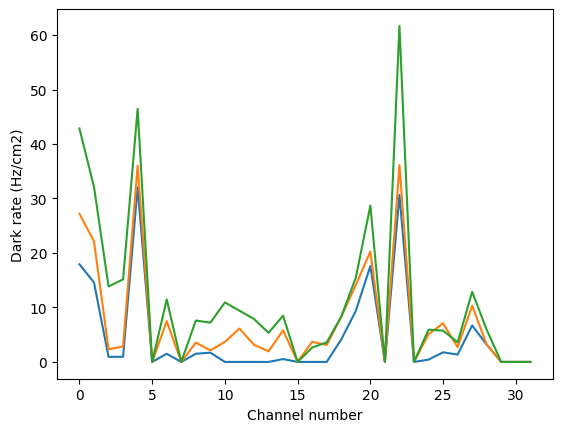

In [8]:
plot_all_ch(800, [0, 50, 100])
plt.xlabel("Channel number")
plt.ylabel("Dark rate (Hz/cm2)")
plt.show()

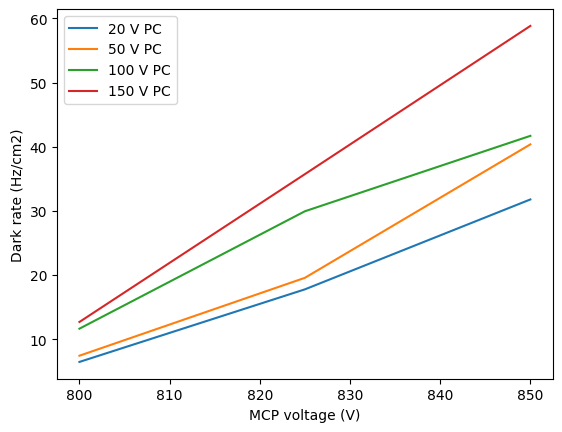

In [12]:
plot_all_mcp(mcp_voltages, 20)
plot_all_mcp(mcp_voltages, 50)
plot_all_mcp(mcp_voltages, 100)
plot_all_mcp(mcp_voltages, 150)
# plot_all_mcp(mcp_voltages, 250)
plt.xlabel("MCP voltage (V)")
plt.ylabel("Dark rate (Hz/cm2)")
plt.legend()
plt.show()

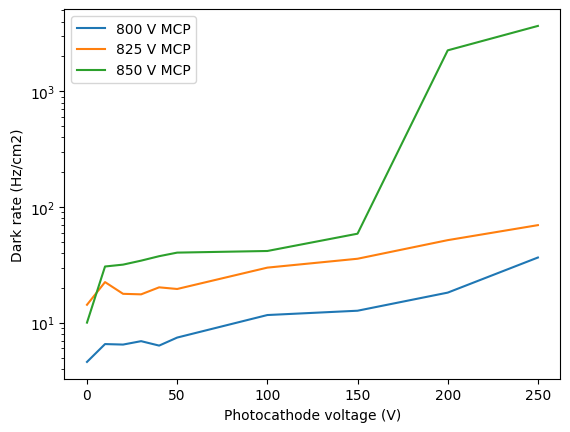

In [10]:
plot_all_pc(800, pc_voltages)
plot_all_pc(825, pc_voltages)
plot_all_pc(850, pc_voltages)
plt.xlabel("Photocathode voltage (V)")
plt.ylabel("Dark rate (Hz/cm2)")
plt.yscale("log")
plt.legend()
plt.show()